# Clusterização com K-means
#### Implementando o algoritmo k-means em uma base de dados de crédito.

In [2]:
# importando as bibliotecas do python
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# colocando os dados no objeto 'dataframe'
dataframe = pd.read_csv('credit_card_clients.csv', encoding = 'utf-8', sep = ',', header = 1)

In [6]:
# visualizando o objeto 'dataframe'
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
# visualizando a dimensão do 'dataframe'
print(dataframe.shape)

(30000, 26)


In [9]:
# somando todas as dívidas em uma só coluna para melhor análise dos dados
dataframe['BILL_TOTAL'] = dataframe['BILL_AMT1'] + dataframe['BILL_AMT2'] + dataframe['BILL_AMT3']  
dataframe['BILL_TOTAL'] = dataframe['BILL_AMT4'] + dataframe['BILL_AMT5'] + dataframe['BILL_AMT6']

In [10]:
# visualizando o objeto 'dataframe'
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,9988
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,44828
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,86820
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,59217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,135221
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,14169
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,60817
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,113573


In [12]:
# pegando os dados referentes ao limite do cartão e a dívida total
x = dataframe.iloc[:, [1, 25]].values

In [14]:
# visualizando 'x'
print(x)

[[ 20000      0]
 [120000   9988]
 [ 90000  44828]
 ...
 [ 30000  60817]
 [ 80000 113573]
 [ 50000  84276]]


In [15]:
# visualizando a dimensão de x
print(x.shape)

(30000, 2)


In [17]:
# criando o objeto 'scaler'
scaler = StandardScaler()

In [18]:
# escalonando os atributos armazenados em 'x'
x = scaler.fit_transform(x)

In [19]:
# criando uma tupla para armazenar a distância média dos dados em relação ao centróide pelo Elbow Method
WCSS = []

In [20]:
# iterando os dados para analisar qual o valor de k clusters ideal
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    # adiciona o valor da distância média dos dados em relação ao centróide
    WCSS.append(kmeans.inertia_)

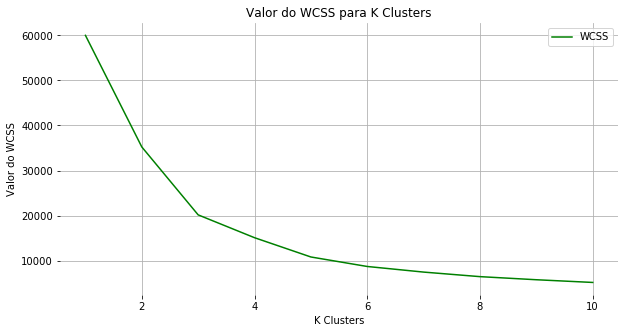

In [21]:
# configurando o gráfico
plt.figure(figsize = (10, 5))
plt.title('Valor do WCSS para K Clusters')
plt.plot(range(1, 11), WCSS, color = 'green', label = 'WCSS')
plt.xlabel('K Clusters')
plt.ylabel('Valor do WCSS')
plt.legend()
plt.box(False)
plt.grid(True)

In [22]:
# visualizando os valores do 'WCSS'
print(WCSS)

[60000.00000000001, 35227.41262146798, 20149.915532274877, 15083.87195558202, 10804.3864933985, 8695.742774609604, 7451.144274876595, 6441.159399040311, 5753.244587235725, 5152.619458346453]


Observando o gráfico, o valor ideal de clusters é k = 4.

In [23]:
# criando o clusterizados 'kmeans'
kmeans = KMeans(n_clusters = 4, random_state = 0)

In [24]:
# realizando o treinamento e a previsão com os dados escalonados 'x'
previsoes = kmeans.fit_predict(x)

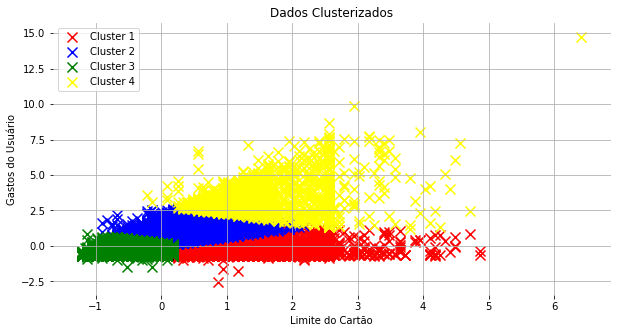

In [25]:
# configurando o gráfico
plt.figure(figsize = (10,5))
plt.title('Dados Clusterizados')
plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s = 100, marker = 'x', c = 'red', 
            label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s = 100, marker = 'x', c = 'blue', 
            label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s = 100, marker = 'x', c = 'green', 
            label = 'Cluster 3')
plt.scatter(x[previsoes == 3, 0], x[previsoes == 3, 1], s = 100, marker = 'x', c = 'yellow', 
            label = 'Cluster 4')
plt.xlabel('Limite do Cartão')
plt.ylabel('Gastos do Usuário')
plt.grid(True)
plt.box(False)
plt.legend()

In [26]:
# importando a biblioteca numpy do python
import numpy as np

In [27]:
# adicionando as previoes aos dados do 'dataframe' e armazenando em 'lista_clientes'
lista_clientes = np.column_stack((dataframe, previsoes))

In [28]:
# visualizando a lista de clientes 
lista_clientes

array([[     1,  20000,      2, ...,      1,      0,      2],
       [     2, 120000,      2, ...,      1,   9988,      2],
       [     3,  90000,      2, ...,      0,  44828,      2],
       ...,
       [ 29998,  30000,      1, ...,      1,  60817,      2],
       [ 29999,  80000,      1, ...,      1, 113573,      2],
       [ 30000,  50000,      1, ...,      1,  84276,      2]], dtype=int64)

In [34]:
# ordenando os dados da linha com as informações de 'previsoes'
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]

In [45]:
# visualizando a lista de clientes com os dados de clusterização ordenados
lista_clientes

array([[   9210,  230000,       2, ...,       0,    9778,       0],
       [  20196,  430000,       2, ...,       0,    3880,       0],
       [   8103,  360000,       1, ...,       0,   32938,       0],
       ...,
       [  20960,  290000,       1, ...,       0,  719630,       3],
       [   4341,  380000,       2, ...,       0, 1053102,       3],
       [   9331,  250000,       2, ...,       0,  702758,       3]],
      dtype=int64)

### Alguma Dúvida? Entre em Contato Comigo:

- [Me envie um e-mail](mailto:alyssonmachado388@gmail.com);